In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Data Understanding & Cleaning

In [2]:
# Reading the data
housing_prices = pd.read_csv('train.csv')
housing_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_prices['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384], dtype=int64)

In [4]:
# Peforming a data description
housing_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Understanding the data-types of columns
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Replacing 'None','NA' with null objects
housing_prices = housing_prices.replace(['None'],np.nan)

In [7]:
housing_prices['LowQualFinSF'].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384], dtype=int64)

In [8]:
# Looking for percentage of null values in each column
for i,col in enumerate(housing_prices.columns):
    print(i, col,'\t',round(100*(housing_prices[col].isnull().sum()/len(housing_prices.index)),2))

0 Id 	 0.0
1 MSSubClass 	 0.0
2 MSZoning 	 0.0
3 LotFrontage 	 17.74
4 LotArea 	 0.0
5 Street 	 0.0
6 Alley 	 93.77
7 LotShape 	 0.0
8 LandContour 	 0.0
9 Utilities 	 0.0
10 LotConfig 	 0.0
11 LandSlope 	 0.0
12 Neighborhood 	 0.0
13 Condition1 	 0.0
14 Condition2 	 0.0
15 BldgType 	 0.0
16 HouseStyle 	 0.0
17 OverallQual 	 0.0
18 OverallCond 	 0.0
19 YearBuilt 	 0.0
20 YearRemodAdd 	 0.0
21 RoofStyle 	 0.0
22 RoofMatl 	 0.0
23 Exterior1st 	 0.0
24 Exterior2nd 	 0.0
25 MasVnrType 	 59.73
26 MasVnrArea 	 0.55
27 ExterQual 	 0.0
28 ExterCond 	 0.0
29 Foundation 	 0.0
30 BsmtQual 	 2.53
31 BsmtCond 	 2.53
32 BsmtExposure 	 2.6
33 BsmtFinType1 	 2.53
34 BsmtFinSF1 	 0.0
35 BsmtFinType2 	 2.6
36 BsmtFinSF2 	 0.0
37 BsmtUnfSF 	 0.0
38 TotalBsmtSF 	 0.0
39 Heating 	 0.0
40 HeatingQC 	 0.0
41 CentralAir 	 0.0
42 Electrical 	 0.07
43 1stFlrSF 	 0.0
44 2ndFlrSF 	 0.0
45 LowQualFinSF 	 0.0
46 GrLivArea 	 0.0
47 BsmtFullBath 	 0.0
48 BsmtHalfBath 	 0.0
49 FullBath 	 0.0
50 HalfBath 	 0.0
51 Bedroo

In [9]:
# Imputing LotFrontage null values with 0
housing_prices['LotFrontage'] = housing_prices['LotFrontage'].replace([np.nan],0)

In [10]:
# Imputing GarageYrBlt null values with the year '2020'
housing_prices['GarageYrBlt'] = housing_prices['GarageYrBlt'].replace([np.nan],2020)

In [11]:
# Imputing the 'NA' string values of LotFrontage and MasVnrArea with 0
housing_prices['LotFrontage'] = housing_prices['LotFrontage'].replace(['NA'],0)
housing_prices['MasVnrArea'] = housing_prices['MasVnrArea'].replace(['NA'],0)

In [12]:
# Extracting the list of columns with more than 40% null values
per_list = []
for i,col in enumerate(housing_prices.columns):
    percentage = round(100*(housing_prices[col].isnull().sum()/len(housing_prices.index)),2)
    if percentage > 40:
        per_list.append(col)
        print(i, col,'\t',percentage)

6 Alley 	 93.77
25 MasVnrType 	 59.73
57 FireplaceQu 	 47.26
72 PoolQC 	 99.52
73 Fence 	 80.75
74 MiscFeature 	 96.3


In [13]:
# Removing null values from 'MasVnrType'
#housing_prices = housing_prices[~housing_prices['MasVnrType'].isnull()]
# len(housing_prices[~housing_prices['MasVnrArea'].isnull()])

In [14]:
# Dropping extracted columns
housing_prices = housing_prices.drop(per_list, axis =1) 

In [15]:
len(housing_prices.columns)

75

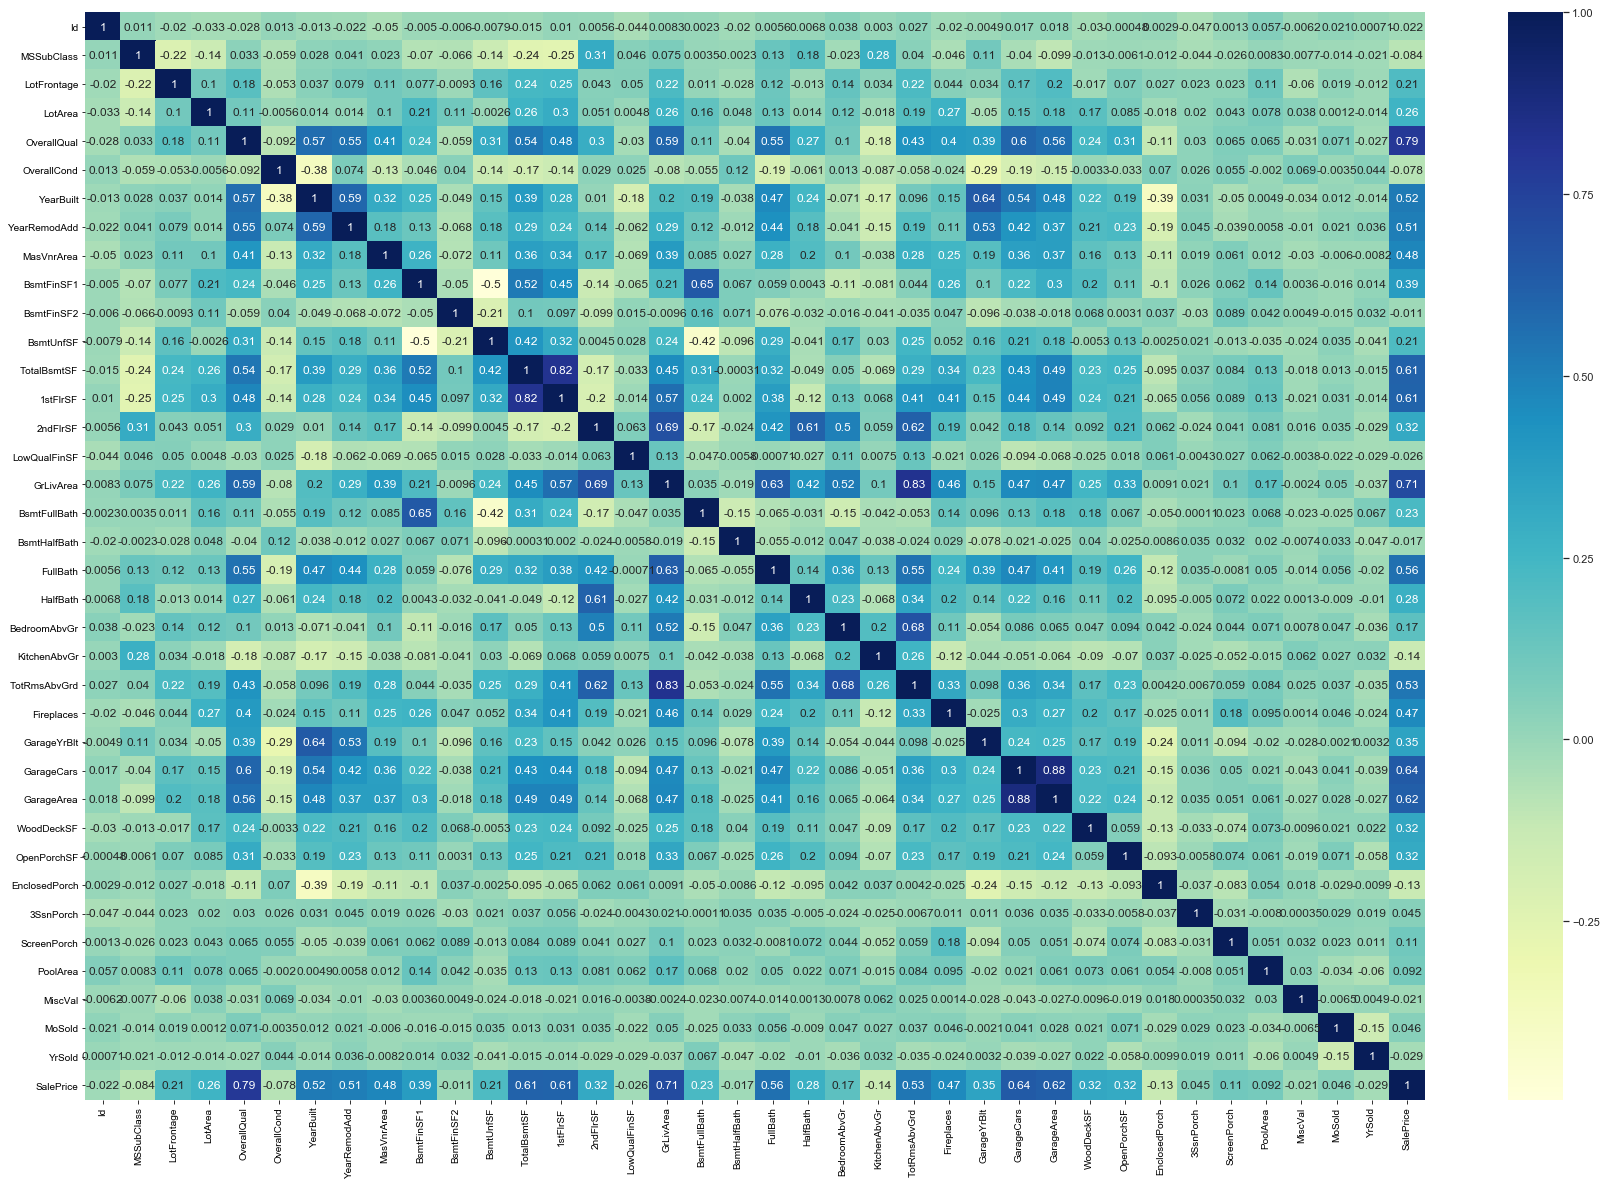

In [16]:
# Ploting correlation heatmap
f, axes = plt.subplots(1, 1, figsize=(30, 20), sharex=True)
sns.set(style="whitegrid")
sns.heatmap(housing_prices.corr(), cmap="YlGnBu", annot=True)

## Data Pre-Processing

In [17]:
# Creating rank doctionaries to map the values of ordinal variables

rank_dict = {
           "10":"Very Excellent",
           "9":"Excellent",
           "8":"Very Good",
        "7":"Good",
         "6":"Above Average",
         "5":"Average",
         "4":"Below Average",
         "3":"Fair",
         "2":"Poor",
         "1":"Very Poor"
       }
rank_dict2 = {
                "Ex":9,
                "Gd":7,
                "TA":5,
                "Fa":3,
                "Po":2,
                "NA":0,
                "No":1,
                "Av":5,
                "Mn":2,
                np.nan : 0
             }

In [18]:
# List of ordinal variables
rank_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
             'BsmtExposure','HeatingQC','KitchenQual','GarageQual','GarageCond']

In [19]:
for col in rank_list:
    housing_prices[col] = housing_prices[col].map(rank_dict2) 

In [20]:
housing_prices.OverallQual.unique().tolist()

[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]

In [21]:
# Creating Dummy Variables for Nominal Categories
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True, prefix = x)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [22]:
categorical = ['MSSubClass',"MSZoning","Street","LotShape","LandContour","Utilities","LotConfig",
               "LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle",
               "RoofStyle","RoofMatl","Exterior1st","Exterior2nd","Foundation",
               "BsmtFinType1","BsmtFinType2","Heating","CentralAir","Electrical",
               "Functional","GarageType","GarageFinish","PavedDrive","SaleType","SaleCondition"]
len(categorical)

29

In [23]:
for col in categorical:
    housing_prices = dummies(col,housing_prices) 

In [24]:
# Since, some columns had redundant ordinal values, derived features can be made from them
housing_prices['Overall_QualCond'] = housing_prices[['OverallQual','OverallCond']].mean(axis=1)
housing_prices['Bsmt_QualCond'] = housing_prices[['BsmtQual','BsmtCond']].mean(axis=1)
housing_prices['Exter_QualCond'] = housing_prices[['ExterQual','ExterCond']].mean(axis=1)
housing_prices['Garage_QualCond'] = housing_prices[['GarageQual','GarageCond']].mean(axis=1)

In [25]:
housing_prices[['Bsmt_QualCond','Exter_QualCond','Garage_QualCond']].head()

,Bsmt_QualCond,Exter_QualCond,Garage_QualCond
0,6.0,6.0,5.0
1,6.0,5.0,5.0
2,6.0,6.0,5.0
3,6.0,5.0,5.0
4,6.0,6.0,5.0


In [26]:
# Quantifying variables with 'Year' as data
housing_prices['HouseAge'] = 2020 - housing_prices['YearBuilt'].astype(int)
housing_prices['RennovationAge'] = 2020 - housing_prices['YearRemodAdd'].astype(int)
housing_prices['YrSoldAge'] = 2020 - housing_prices['YrSold'].astype(int)
housing_prices['GarageYrBltAge'] = 2020 - housing_prices['GarageYrBlt'].astype(int)

In [27]:
len(housing_prices.columns)

230

In [28]:
# List of source variables for derived features
derived_src = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt','OverallQual','OverallCond',
               'BsmtQual','BsmtCond','ExterQual','ExterCond','GarageQual','GarageCond']

In [29]:
# List of derived features
derived = ['HouseAge','RennovationAge','YrSoldAge','GarageYrBltAge','Overall_QualCond',
           'Bsmt_QualCond','Exter_QualCond','Garage_QualCond']

In [30]:
# Making the list of final features
final_cols = list(set(housing_prices.columns.tolist()) - set(derived_src))

In [31]:
final_cols

['BsmtFinType2_BLQ',
 'PavedDrive_Y',
 'LotConfig_FR2',
 'MSSubClass_70',
 'YrSoldAge',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'Exterior1st_BrkFace',
 '2ndFlrSF',
 'MSSubClass_80',
 'LowQualFinSF',
 'Condition2_Norm',
 'MSSubClass_30',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'BsmtHalfBath',
 'Neighborhood_Timber',
 'Neighborhood_NPkVill',
 'Exterior2nd_Wd Shng',
 'MSZoning_FV',
 'TotalBsmtSF',
 'Exterior1st_HdBoard',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'SaleCondition_Normal',
 'ScreenPorch',
 'MSSubClass_160',
 'MSSubClass_180',
 'Condition2_PosA',
 'Exterior1st_BrkComm',
 'KitchenQual',
 'Condition1_RRNn',
 'RennovationAge',
 'MSSubClass_75',
 'Neighborhood_NWAmes',
 'Neighborhood_Veenker',
 'BsmtExposure',
 'FullBath',
 'Functional_Mod',
 'GarageType_BuiltIn',
 'Exterior2nd_Stucco',
 'Functional_Min1',
 'BsmtFinType1_GLQ',
 'LotShape_Reg',
 'Exterior2nd_CmentBd',
 'GarageType_Attchd',
 'Neighborhood_MeadowV',
 'BsmtFinType1_LwQ',
 'Neighborhood_Somerst',
 'Elect

In [32]:
housing_price_lr = housing_prices[final_cols]

In [33]:
len(housing_price_lr.columns)

218

In [34]:
nan_rows = housing_price_lr[housing_price_lr.isnull().any(1)]
nan_rows

,BsmtFinType2_BLQ,PavedDrive_Y,LotConfig_FR2,MSSubClass_70,YrSoldAge,RoofMatl_Roll,RoofMatl_Tar&Grv,Exterior1st_BrkFace,2ndFlrSF,MSSubClass_80,...,BsmtFullBath,Neighborhood_SWISU,SaleType_Con,MasVnrArea,Electrical_FuseF,Exterior1st_ImStucc,Neighborhood_SawyerW,Exterior2nd_AsphShn,RoofStyle_Shed,LandContour_Low
234,0,1,0,0,10,0,0,0,1100,0,...,1,0,0,NaN,0,0,0,0,0,0
529,0,1,0,0,13,0,0,0,0,0,...,1,0,0,NaN,0,0,0,0,0,0
650,0,1,0,0,12,0,0,0,843,0,...,0,0,0,NaN,0,0,0,0,0,0
936,0,1,0,0,11,0,0,0,0,0,...,1,0,0,NaN,0,0,1,0,0,0
973,0,1,0,0,12,0,0,0,0,0,...,0,0,0,NaN,0,0,0,0,0,0
977,0,1,0,0,13,0,0,0,0,0,...,1,0,0,NaN,0,0,0,0,0,0
1243,0,1,0,0,14,0,0,0,0,0,...,1,0,0,NaN,0,0,0,0,0,0
1278,0,1,0,0,12,0,0,0,903,0,...,1,0,0,NaN,0,0,0,0,0,0


In [35]:
housing_price_lr = housing_price_lr[~housing_price_lr['MasVnrArea'].isnull()]

In [36]:
# Splitting the dataset to train and test set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing_price_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
# MinMaxScaler for continuous and ordinal categorical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vars = ['BsmtExposure','HeatingQC','KitchenQual',"LotFrontage",
        "LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
        "2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath",
        "BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF",
        "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal",'SalePrice']
vars.extend(derived)
df_train[vars] = scaler.fit_transform(df_train[vars])

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\amlan\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
y_train = df_train.pop('SalePrice')

In [39]:
X_train = df_train

In [40]:
print(X_train.columns)

Index(['BsmtFinType2_BLQ', 'PavedDrive_Y', 'LotConfig_FR2', 'MSSubClass_70',
       'YrSoldAge', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'Exterior1st_BrkFace',
       '2ndFlrSF', 'MSSubClass_80',
       ...
       'BsmtFullBath', 'Neighborhood_SWISU', 'SaleType_Con', 'MasVnrArea',
       'Electrical_FuseF', 'Exterior1st_ImStucc', 'Neighborhood_SawyerW',
       'Exterior2nd_AsphShn', 'RoofStyle_Shed', 'LandContour_Low'],
      dtype='object', length=217)


## Feature Selection & Building

In [41]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50) # running RFE
rfe = rfe.fit(X_train, y_train)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('BsmtFinType2_BLQ', False, 8),
 ('PavedDrive_Y', False, 150),
 ('LotConfig_FR2', False, 92),
 ('MSSubClass_70', False, 84),
 ('YrSoldAge', False, 104),
 ('RoofMatl_Roll', True, 1),
 ('RoofMatl_Tar&Grv', False, 5),
 ('Exterior1st_BrkFace', False, 24),
 ('2ndFlrSF', True, 1),
 ('MSSubClass_80', False, 153),
 ('LowQualFinSF', True, 1),
 ('Condition2_Norm', False, 80),
 ('MSSubClass_30', False, 120),
 ('Exterior1st_Stone', False, 156),
 ('Exterior1st_Stucco', False, 102),
 ('BsmtHalfBath', False, 51),
 ('Neighborhood_Timber', False, 93),
 ('Neighborhood_NPkVill', False, 17),
 ('Exterior2nd_Wd Shng', False, 49),
 ('MSZoning_FV', True, 1),
 ('TotalBsmtSF', True, 1),
 ('Exterior1st_HdBoard', False, 67),
 ('Neighborhood_CollgCr', False, 138),
 ('Neighborhood_Crawfor', True, 1),
 ('SaleCondition_Normal', False, 73),
 ('ScreenPorch', False, 113),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 12),
 ('Condition2_PosA', True, 1),
 ('Exterior1st_BrkComm', False, 114),
 ('KitchenQual', T

In [43]:
col = X_train.columns[rfe.support_].tolist()
print(col)
len(col)

['RoofMatl_Roll', '2ndFlrSF', 'LowQualFinSF', 'MSZoning_FV', 'TotalBsmtSF', 'Neighborhood_Crawfor', 'MSSubClass_160', 'Condition2_PosA', 'KitchenQual', 'MSSubClass_75', 'Exterior2nd_CmentBd', 'MSZoning_RH', 'Neighborhood_StoneBr', 'RoofMatl_WdShake', 'LotArea', 'Heating_OthW', 'Overall_QualCond', 'RoofMatl_Metal', 'LandSlope_Sev', 'BsmtUnfSF', 'GarageCars', 'SaleType_Oth', 'BsmtFinSF1', 'Exterior1st_CemntBd', 'SaleType_New', 'HouseAge', 'GrLivArea', 'SaleCondition_Partial', 'Utilities_NoSeWa', 'Condition2_PosN', 'MSZoning_RM', '1stFlrSF', 'Neighborhood_NridgHt', 'KitchenAbvGr', 'Functional_Sev', 'SaleType_ConLI', 'Foundation_Wood', 'Exterior2nd_CBlock', 'SaleType_ConLD', 'Neighborhood_NoRidge', 'BsmtFinSF2', 'Exterior1st_CBlock', 'MSZoning_RL', 'HouseStyle_2.5Unf', 'BldgType_Duplex', 'MSSubClass_90', 'BedroomAbvGr', 'SaleType_Con', 'MasVnrArea', 'RoofStyle_Shed']


50

In [45]:
X_train_rfe = X_train[col]
len(X_train_rfe.columns.tolist())

50

### Ridge Regression

In [46]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 50
ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train[col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
model_cv_ridge.best_estimator_

Ridge()

In [157]:
# Creating a dataframe out of the cross-validation results from ridge regression
cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007595,0.002243,0.002598,0.000489,0.0001,{'alpha': 0.0001},-0.030757,-0.023512,-0.027235,-0.024530,...,-0.026390,0.002523,18,-0.022776,-0.023929,-0.023070,-0.024120,-0.023268,-0.023433,0.000511
1,0.010794,0.002480,0.003598,0.001853,0.001,{'alpha': 0.001},-0.030754,-0.023506,-0.027233,-0.024528,...,-0.026388,0.002524,17,-0.022777,-0.023929,-0.023069,-0.024119,-0.023268,-0.023433,0.000511
2,0.010194,0.003707,0.004397,0.002726,0.01,{'alpha': 0.01},-0.030730,-0.023454,-0.027215,-0.024514,...,-0.026363,0.002529,16,-0.022780,-0.023931,-0.023064,-0.024116,-0.023271,-0.023432,0.000511
3,0.009593,0.002578,0.002199,0.000748,0.05,{'alpha': 0.05},-0.030633,-0.023268,-0.027140,-0.024460,...,-0.026265,0.002544,15,-0.022795,-0.023939,-0.023057,-0.024104,-0.023287,-0.023437,0.000505
4,0.006197,0.002134,0.002398,0.001854,0.1,{'alpha': 0.1},-0.030534,-0.023115,-0.027071,-0.024405,...,-0.026175,0.002552,13,-0.022814,-0.023954,-0.023063,-0.024092,-0.023310,-0.023447,0.000498


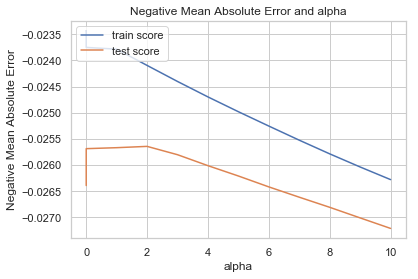

In [158]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<b> The train and test scores are heading towards convergence with increasing value of alpha. Hence, this behaviour validates that regularization strategy worked fine <b>

### Lasso Regression

In [159]:
lasso = Lasso()
params_lasso = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train[col], y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [226]:
# Creating a dataframe out of the cross-validation results from lasso regression
cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.001]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.103742,0.031978,0.003197,0.001165,0.0001,{'alpha': 0.0001},-0.029788,-0.022747,-0.026437,-0.024003,...,-0.025678,0.002408,1,-0.023675,-0.024789,-0.023753,-0.024506,-0.023952,-0.024135,0.000437
1,0.027582,0.006557,0.002199,0.000400,0.0002,{'alpha': 0.0002},-0.030018,-0.022933,-0.026824,-0.024529,...,-0.025963,0.002396,2,-0.024106,-0.025365,-0.024320,-0.024906,-0.024653,-0.024670,0.000443
2,0.015790,0.000748,0.002602,0.000805,0.0003,{'alpha': 0.0003},-0.030377,-0.023660,-0.027276,-0.024932,...,-0.026397,0.002313,3,-0.024513,-0.026183,-0.024913,-0.025329,-0.025309,-0.025250,0.000554
3,0.011995,0.001261,0.002197,0.000746,0.0004,{'alpha': 0.0004},-0.030669,-0.024147,-0.027540,-0.025060,...,-0.026680,0.002292,4,-0.024935,-0.026573,-0.025401,-0.025694,-0.025871,-0.025695,0.000541
4,0.019791,0.012211,0.004396,0.002416,0.0005,{'alpha': 0.0005},-0.030838,-0.024603,-0.027873,-0.025309,...,-0.026985,0.002221,5,-0.025289,-0.026948,-0.025926,-0.026224,-0.026444,-0.026166,0.000551


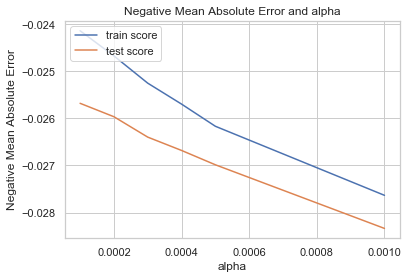

In [227]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<b>The train and test scores are heading towards convergence with increasing value of alpha. Hence, this behaviour validates that regularization strategy worked fine<b> 

In [232]:
# Model Building Ridge -I
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-0.00473227, -0.00807975, -0.01187606,  0.00271972, -0.01759075,
        0.00187252,  0.00850834,  0.08340625, -0.0014255 ,  0.00640987,
        0.00978635,  0.08635988,  0.05569057,  0.01877535,  0.06556161,
        0.01060681,  0.01200437, -0.02928715,  0.01325897,  0.00432769,
       -0.00187218, -0.00924676,  0.06864081, -0.01187606,  0.10295452,
        0.06602788,  0.04116543, -0.00030043,  0.00343443,  0.01135106,
       -0.01629659,  0.00189967,  0.09933653,  0.09455765,  0.00052723,
        0.0471684 , -0.06038963, -0.01584171,  0.00198963,  0.03260967,
       -0.04086335,  0.00540412, -0.00818969, -0.00135202,  0.06468088,
        0.02365456, -0.00546807, -0.00636654,  0.04027812,  0.02144984])

In [233]:
# Model Building Ridge - II
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-7.80814801e-03, -3.94433022e-03, -1.16141583e-02, -1.16664834e-03,
       -2.82096775e-02,  4.59175905e-03,  8.89163069e-03,  9.30221950e-02,
        3.42325808e-04,  1.02994164e-02,  1.37799087e-02,  9.79275556e-02,
        5.72940017e-02,  2.36932034e-02,  5.90216409e-02,  4.75304883e-03,
        1.91866163e-02, -3.20344391e-02,  1.82075084e-02,  9.30231679e-03,
       -8.78375507e-03, -1.78853943e-02,  7.10215338e-02, -1.16141583e-02,
        1.15193095e-01,  5.72306751e-02,  4.14286802e-02, -2.41116974e-03,
        6.30037309e-03,  1.79665893e-02, -2.42516362e-02,  5.59301419e-03,
        1.17682138e-01,  1.06136564e-01, -4.56541085e-05,  5.54319450e-02,
       -6.61533831e-02, -2.35097587e-02, -8.21070034e-03,  3.62439931e-02,
       -7.99314178e-02,  8.87885531e-03, -1.48224873e-02, -3.59397330e-03,
        6.70741180e-02,  3.49614850e-02, -1.22353383e-02, -1.18722645e-02,
        6.10896535e-02,  2.56208095e-02])

In [234]:
# Model Building Ridge - III
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-0.00340961, -0.01024569, -0.01166695,  0.00369042, -0.01306714,
        0.00086063,  0.00927139,  0.07699516, -0.00173643,  0.00481414,
        0.00772022,  0.07902684,  0.05409494,  0.01604212,  0.06794996,
        0.0132042 ,  0.00889275, -0.02691942,  0.01185136,  0.00246811,
        0.00119257, -0.0061121 ,  0.06584056, -0.01166695,  0.09439508,
        0.06995894,  0.04016151,  0.00033747,  0.00228638,  0.00853735,
       -0.0123057 ,  0.0005098 ,  0.08776954,  0.08631496,  0.00045169,
        0.04121836, -0.05680485, -0.01214567,  0.00618724,  0.02938213,
       -0.02674774,  0.00393322, -0.00460762, -0.00066337,  0.06163486,
        0.01850584, -0.0024231 , -0.00432214,  0.03107018,  0.02048778])

In [185]:
# Model Building - I
lasso1 = Lasso(alpha=0.001)
lasso1.fit(X_train_rfe,y_train)
lasso1.coef_

array([-0.        , -0.0119197 , -0.        ,  0.        , -0.        ,
        0.        ,  0.00280955,  0.        , -0.        ,  0.        ,
        0.        ,  0.09345219,  0.04651183,  0.        ,  0.06342711,
        0.        ,  0.        , -0.00262271,  0.        ,  0.        ,
        0.        , -0.        ,  0.06488901, -0.        ,  0.28808113,
        0.07065881,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.12638572,  0.        , -0.        ,
        0.0140608 , -0.05893366, -0.        , -0.        ,  0.00198294,
       -0.        ,  0.        ,  0.        , -0.        ,  0.05047816,
        0.        ,  0.        , -0.        ,  0.        ,  0.02640258])

<b> We can see coefficents with 0 values. Lasso has basically penalized and deemed the counterpart features as unnecessary <b>

In [186]:
# Creating dataframe for 1st Lasso model
lasso1_df = pd.DataFrame()

In [187]:
lasso1_df['Features'] = X_train_rfe.columns.tolist()
lasso1_df['Coefficients'] = lasso1.coef_.tolist()

In [188]:
lasso1_df

,Features,Coefficients
0,Utilities_NoSeWa,-0.000000
1,MSZoning_RM,-0.011920
2,BldgType_Duplex,-0.000000
3,BsmtFinType2_GLQ,0.000000
4,KitchenAbvGr,-0.000000
5,Exterior2nd_Stone,0.000000
6,MSZoning_RL,0.002810
7,2ndFlrSF,0.000000
8,MSZoning_RH,-0.000000
9,SaleType_ConLI,0.000000


In [189]:
# Removing coefficients with 0 values
lasso1_df = lasso1_df[lasso1_df['Coefficients'] != 0.00]

In [190]:
lasso1_df

,Features,Coefficients
1,MSZoning_RM,-0.011920
6,MSZoning_RL,0.002810
11,TotalBsmtSF,0.093452
12,Neighborhood_NridgHt,0.046512
14,GarageCars,0.063427
17,MSSubClass_160,-0.002623
22,BsmtFinSF1,0.064889
24,GrLivArea,0.288081
25,KitchenQual,0.070659
32,Overall_QualCond,0.126386


In [191]:
len(lasso1_df.index)

15

In [192]:
# Model Building - 2
lasso2 = Lasso(alpha=0.005)
lasso2 = lasso2.fit(X_train_rfe,y_train)
lasso2_df = pd.DataFrame()
lasso2_df['Features'] = X_train_rfe.columns.tolist()
lasso2_df['Coefficients'] = lasso2.coef_.tolist()
lasso2_df = lasso2_df[lasso2_df['Coefficients'] != 0.00]

In [193]:
# Model Building - 3
lasso3 = Lasso(alpha=0.0001)
lasso3 = lasso3.fit(X_train_rfe,y_train)
lasso3_df = pd.DataFrame()
lasso3_df['Features'] = X_train_rfe.columns.tolist()
lasso3_df['Coefficients'] = lasso3.coef_.tolist()
lasso3_df = lasso3_df[lasso3_df['Coefficients'] != 0.00]`

In [194]:
# Model Building - 4
lasso4 = Lasso(alpha=0.1)
lasso4 = lasso4.fit(X_train_rfe,y_train)
lasso4_df = pd.DataFrame()
lasso4_df['Features'] = X_train_rfe.columns.tolist()
lasso4_df['Coefficients'] = lasso4.coef_.tolist()
lasso4_df = lasso4_df[lasso4_df['Coefficients'] != 0.00]

In [195]:
# Model Building - 5
lasso5 = Lasso(alpha=0.0027)
lasso5 = lasso5.fit(X_train_rfe,y_train)
lasso5_df = pd.DataFrame()
lasso5_df['Features'] = X_train_rfe.columns.tolist()
lasso5_df['Coefficients'] = lasso5.coef_.tolist()
lasso5_df = lasso5_df[lasso5_df['Coefficients'] != 0.00]

In [196]:
lasso2_df

,Features,Coefficients
1,MSZoning_RM,-0.002359
6,MSZoning_RL,0.011008
11,TotalBsmtSF,0.012895
12,Neighborhood_NridgHt,0.015447
14,GarageCars,0.092576
22,BsmtFinSF1,0.016130
24,GrLivArea,0.104368
25,KitchenQual,0.132324
36,HouseAge,-0.021704
49,SaleType_New,0.000532


In [197]:
lasso3_df

,Features,Coefficients
1,MSZoning_RM,-0.001446
4,KitchenAbvGr,-0.054120
6,MSZoning_RL,0.006661
7,2ndFlrSF,0.014305
11,TotalBsmtSF,0.119125
12,Neighborhood_NridgHt,0.052886
13,MSZoning_FV,0.022715
14,GarageCars,0.038808
16,SaleType_Con,0.008384
17,MSSubClass_160,-0.030850


In [198]:
lasso4_df

,Features,Coefficients


In [199]:
lasso5_df

,Features,Coefficients
1,MSZoning_RM,-0.005469
6,MSZoning_RL,0.007956
11,TotalBsmtSF,0.063079
12,Neighborhood_NridgHt,0.031355
14,GarageCars,0.079040
22,BsmtFinSF1,0.046015
24,GrLivArea,0.224569
25,KitchenQual,0.106407
32,Overall_QualCond,0.034462
36,HouseAge,-0.041971


<b>Model-1, 2 and 5 seem to be relevant as per the results<b>

In [200]:
# Scaling the values of test set
df_test[vars] = scaler.fit_transform(df_test[vars])

c:\program files\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\amlan\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [201]:
y_test = df_test.pop('SalePrice')

In [202]:
# Preferrable models: lasso1, lasso2 and lasso5
X_test_lasso1 = df_test[lasso1_df.Features.tolist()]
X_test_lasso2 = df_test[lasso2_df.Features.tolist()]
X_test_lasso5 = df_test[lasso5_df.Features.tolist()]

In [203]:
# Test model
from sklearn.metrics import mean_squared_error

In [204]:
# Performing OLS summary using statsmodels on selected models as mentioned above
Xtrain_lasso1 = sm.add_constant(X_train[lasso1_df.Features.tolist()])
ols1 = sm.OLS(y_train,Xtrain_lasso1).fit()
ols1.summary()

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     391.3
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:57:34   Log-Likelihood:                 1784.3
No. Observations:                1016   AIC:                            -3537.
Df Residuals:                    1000   BIC:                            -3458.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0293      0.010     -3.064      0.002      -0.048      -0.011
MSZoning_RM             -0.0154      0.007     -2.249      0.025      -0.029      -0.002
MSZoning_RL             -0.0070      0.006     -1.165      0.244      -0.019       0.005
TotalBsmtSF              0.1012      0.014      7.228      0.000       0.074       0.129
Neighborhood_NridgHt     0.0620      0.007      9.357      0.000       0.049       0.075
GarageCars               0.0515      0.010      5.284      0.000       0.032       0.071
MSSubClass_160          -0.0285      0.007     -3.953      0.000      -0.043      -0.014
BsmtFinSF1               0.0742      0.008      9.331      0.000       0.059       0.090
GrLivArea                0.3241      0.014     22.448      0.000       0.296       0.352
KitchenQual              0.0454      0.009      5.221      0.000       0.028       0.062
Overall_QualCond         0.1691      0.014     12.247      0.000       0.142       0.196
Neighborhood_StoneBr     0.0665      0.010      6.555      0.000       0.047       0.086
HouseAge                -0.0841      0.009     -9.336      0.000      -0.102      -0.066
Neighborhood_Crawfor     0.0398      0.008      4.794      0.000       0.024       0.056
Neighborhood_NoRidge     0.0775      0.009      8.763      0.000       0.060       0.095
SaleType_New             0.0294      0.005      5.360      0.000       0.019       0.040
==============================================================================
Omnibus:                      299.138   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26095.220
Skew:                          -0.257   Prob(JB):                         0.00
Kurtosis:                      27.823   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
Xtrain_lasso2 = sm.add_constant(X_train[lasso2_df.Features.tolist()])
c

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     420.8
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:58:00   Log-Likelihood:                 1641.6
No. Observations:                1016   AIC:                            -3261.
Df Residuals:                    1005   BIC:                            -3207.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0214      0.009     -2.304      0.021      -0.040      -0.003
MSZoning_RM             -0.0053      0.008     -0.679      0.498      -0.021       0.010
MSZoning_RL              0.0062      0.007      0.943      0.346      -0.007       0.019
TotalBsmtSF              0.1274      0.016      8.062      0.000       0.096       0.158
Neighborhood_NridgHt     0.0485      0.007      6.524      0.000       0.034       0.063
GarageCars               0.0689      0.011      6.201      0.000       0.047       0.091
BsmtFinSF1               0.0836      0.009      9.218      0.000       0.066       0.101
GrLivArea                0.3915      0.016     24.970      0.000       0.361       0.422
KitchenQual              0.0931      0.009     10.097      0.000       0.075       0.111
HouseAge                -0.0642      0.010     -6.663      0.000      -0.083      -0.045
SaleType_New             0.0284      0.006      4.578      0.000       0.016       0.041
==============================================================================
Omnibus:                      292.397   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20604.858
Skew:                          -0.323   Prob(JB):                         0.00
Kurtosis:                      25.052   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
Xtrain_lasso5 = sm.add_constant(X_train[lasso5_df.Features.tolist()])
ols5 = sm.OLS(y_train,Xtrain_lasso5).fit()
ols5.summary()

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     450.0
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:                 1747.1
No. Observations:                1016   AIC:                            -3468.
Df Residuals:                    1003   BIC:                            -3404.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0555      0.009     -6.134      0.000      -0.073      -0.038
MSZoning_RM             -0.0150      0.007     -2.139      0.033      -0.029      -0.001
MSZoning_RL              0.0015      0.006      0.247      0.805      -0.010       0.013
TotalBsmtSF              0.1139      0.014      7.975      0.000       0.086       0.142
Neighborhood_NridgHt     0.0529      0.007      7.821      0.000       0.040       0.066
GarageCars               0.0548      0.010      5.439      0.000       0.035       0.075
BsmtFinSF1               0.0769      0.008      9.364      0.000       0.061       0.093
GrLivArea                0.3256      0.015     21.802      0.000       0.296       0.355
KitchenQual              0.0515      0.009      5.751      0.000       0.034       0.069
Overall_QualCond         0.1826      0.014     12.906      0.000       0.155       0.210
HouseAge                -0.0673      0.009     -7.673      0.000      -0.085      -0.050
Neighborhood_NoRidge     0.0713      0.009      7.822      0.000       0.053       0.089
SaleType_New             0.0347      0.006      6.164      0.000       0.024       0.046
==============================================================================
Omnibus:                      299.255   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26604.358
Skew:                          -0.245   Prob(JB):                         0.00
Kurtosis:                      28.064   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
# Method to filter features using p-values
def filter_pvalue(ols_df):
    ols_df = ols_df[ols_df['p_value'].astype('float32') <= 0.05]
    return ols_df

In [208]:
# Creating final dataframes of all the significant features
ols5df = pd.DataFrame()
ols5df['Features'] = ols5.pvalues.index
ols5df['p_value'] = ols5.pvalues.tolist()

ols2df = pd.DataFrame()
ols2df['Features'] = ols2.pvalues.index
ols2df['p_value'] = ols2.pvalues.tolist()

ols1df = pd.DataFrame()
ols1df['Features'] = ols1.pvalues.index
ols1df['p_value'] = ols1.pvalues.tolist()

In [209]:
ols1df = filter_pvalue(ols1df)
ols2df = filter_pvalue(ols2df)
ols5df = filter_pvalue(ols5df)

In [210]:
ols5df

,Features,p_value
0,const,1.231686e-09
1,MSZoning_RM,3.269677e-02
3,TotalBsmtSF,4.141282e-15
4,Neighborhood_NridgHt,1.323989e-14
5,GarageCars,6.742986e-08
6,BsmtFinSF1,4.893980e-20
7,GrLivArea,1.446918e-86
8,KitchenQual,1.178341e-08
9,Overall_QualCond,2.299889e-35
10,HouseAge,3.973750e-14


In [211]:
ols2df

,Features,p_value
0,const,2.142587e-02
3,TotalBsmtSF,2.119875e-15
4,Neighborhood_NridgHt,1.086542e-10
5,GarageCars,8.166567e-10
6,BsmtFinSF1,1.727342e-19
7,GrLivArea,1.887022e-107
8,KitchenQual,6.711805e-23
9,HouseAge,4.424460e-11
10,SaleType_New,5.277545e-06


In [212]:
ols1df

,Features,p_value
0,const,2.245522e-03
1,MSZoning_RM,2.475741e-02
3,TotalBsmtSF,9.715519e-13
4,Neighborhood_NridgHt,5.224561e-20
5,GarageCars,1.550876e-07
6,MSSubClass_160,8.256114e-05
7,BsmtFinSF1,6.554688e-20
8,GrLivArea,1.070975e-90
9,KitchenQual,2.168249e-07
10,Overall_QualCond,3.124336e-32


In [213]:
a_set = set(ols1df.Features.unique().tolist())
b_set = set(ols2df.Features.unique().tolist())
c_set = set(ols5df.Features.unique().tolist())

In [215]:
# Final list of features
final_ftrs = list(a_set.intersection(b_set).intersection(c_set))
print(final_ftrs)

['TotalBsmtSF', 'GrLivArea', 'Neighborhood_NridgHt', 'KitchenQual', 'GarageCars', 'BsmtFinSF1', 'HouseAge', 'SaleType_New', 'const']


In [217]:
final_ftrs.remove('const')

In [218]:
# Model Building - 6
Xtrain_final = sm.add_constant(X_train[final_ftrs])
ols_final = sm.OLS(y_train,Xtrain_final).fit()
ols_final.summary()

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     522.9
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:07:06   Log-Likelihood:                 1638.4
No. Observations:                1016   AIC:                            -3259.
Df Residuals:                    1007   BIC:                            -3215.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0165      0.008     -2.173      0.030      -0.031      -0.002
TotalBsmtSF              0.1325      0.016      8.473      0.000       0.102       0.163
GrLivArea                0.3937      0.016     25.147      0.000       0.363       0.424
Neighborhood_NridgHt     0.0485      0.007      6.537      0.000       0.034       0.063
KitchenQual              0.0914      0.009      9.919      0.000       0.073       0.109
GarageCars               0.0678      0.011      6.104      0.000       0.046       0.090
BsmtFinSF1               0.0854      0.009      9.418      0.000       0.068       0.103
HouseAge                -0.0712      0.009     -7.868      0.000      -0.089      -0.053
SaleType_New             0.0273      0.006      4.426      0.000       0.015       0.039
==============================================================================
Omnibus:                      299.041   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20677.114
Skew:                          -0.382   Prob(JB):                         0.00
Kurtosis:                      25.087   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
# Subjective questions
remaining_features = list(set(X_train_rfe.columns.tolist())-set(final_ftrs))

lasso_model_q3 = Lasso(alpha=0.005)

lasso_model_q3 = lasso_model_q3.fit(X_train_rfe[remaining_features],y_train)
lasso_q3_df = pd.DataFrame()
lasso_q3_df['Features'] = remaining_features
lasso_q3_df['Coefficients'] = lasso_model_q3.coef_.tolist()
lasso_q3_df = lasso_q3_df[lasso_q3_df['Features'] != 0.00]

Xtrain_lasso_q3 = sm.add_constant(X_train[lasso_q3_df.Features.tolist()])
ols_q3 = sm.OLS(y_train,Xtrain_lasso_q3).fit()
print(ols_q3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 20 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:49:18   Log-Likelihood:                 1710.2
No. Observations:                1016   AIC:                            -3336.
Df Residuals:                     974   BIC:                            -3130.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

c:\program files\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
